In [123]:
# Importing libraries
import numpy as np
import pandas as pd

In [124]:
from Data_Prep import dataPrep  

In [125]:
df = dataPrep()

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


#      Default Decision Tree

In [126]:
# Importing sklearn library 
from sklearn.model_selection import train_test_split

In [127]:
# x: input variable
# y: target variable
# x: dropping the target variable in y
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)

In [128]:
# Random state
random_state = 100

# Transforming x into matrix form
X_matrix = X.values

In [129]:
# Splitting the data into training and testing sets 
# Training set : 70%
# Test set : 30%
# A consistent random seed ensures the results of running an algorithm consistent along multiple runs
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_matrix, y, test_size=0.3, stratify=y, random_state=random_state)

In [130]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Traing the decision tree
model_dt = DecisionTreeClassifier(random_state=random_state)
model_dt.fit(X_train_1, y_train_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [131]:
# Checking the Train and Test accuracy of the Decision Tree model
print("Train accuracy:", model_dt.score(X_train_1, y_train_1))
print("Test accuracy:", model_dt.score(X_test_1, y_test_1))

Train accuracy: 0.9997933386146799
Test accuracy: 0.782608695652174


In [132]:
# Prediction based on X_test data
y_pred = model_dt.predict(X_test_1)

# Printing overall report of the prediction
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10832
           1       0.20      0.23      0.21      1611

   micro avg       0.78      0.78      0.78     12443
   macro avg       0.54      0.55      0.54     12443
weighted avg       0.79      0.78      0.79     12443



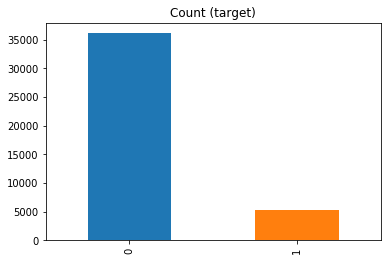

In [133]:
df.IsBadBuy.value_counts().plot(kind='bar', title='Count (target)')

In [134]:
from Data_Prep import analyse_feature_importance

# analyse feature importance 
analyse_feature_importance(model_dt, X_log.columns)

VehBCost : 0.10213232010813172
VehOdo : 0.07808296704317053
MMRAcquisitionAuctionAveragePrice : 0.05702744912235029
MMRCurrentAuctionCleanPrice : 0.056825013568569005
MMRAcquisitonRetailCleanPrice : 0.05528049407599658
MMRCurrentRetailCleanPrice : 0.051800028805558736
MMRCurrentAuctionAveragePrice : 0.05073034467547338
MMRCurrentRetailAveragePrice : 0.050478097983647253
MMRAcquisitionRetailAveragePrice : 0.04952818938236662
WarrantyCost : 0.045685253253703026
MMRAcquisitionAuctionCleanPrice : 0.04366553500088465
PurchaseMonth : 0.042984829799911375
VehYear : 0.034078131267247604
Color_WHITE : 0.009584900577487643
Auction_MANHEIM : 0.009557326750892116
WheelType_Alloy : 0.009555453968879994
VNST_TX : 0.008411560365581551
Color_GOLD : 0.008393107836333905
Color_RED : 0.008043963995942024
Color_SILVER : 0.007514062408729601


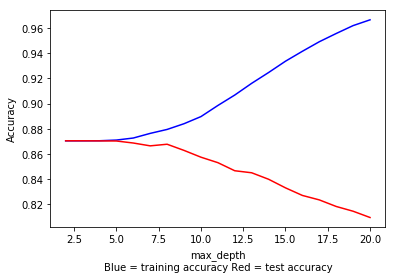

In [135]:
# FOR DEFAULT DECISION TREE

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_train_1, y_train_1)
    
    test_score.append(model.score(X_test_1, y_test_1))
    train_score.append(model.score(X_train_1, y_train_1))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

#### Overfitting of the default decision tree model
From the above resulting plot, we can conclude that there is overfitting. It produced better training accuracy with lower test accuracy and larger gap between training/test performance, which is a huge indication of overfitting.

# SMOTE

From the above diagram, we see there is a huge class imbalance. As the class 0 which is the good buy whereas the class 1 which is the bad buy, with only small porportion of the class 1, the prediction will be more biased towards class 0. As we can see from the f1-score, recall and precision of class 1 which is far lower than that of class 0.

To overcome this issue, we will be using SMOTE technique. SMOTE (Synthetic minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [136]:
# Importing imblearn library and importing SMOTE
from imblearn.over_sampling import SMOTE

In [137]:
#SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train_1, y_train_1)

In [138]:
# Traing the decision tree
model_dt_sm = DecisionTreeClassifier(random_state=random_state)
model_dt_sm.fit(X_train_sm, y_train_sm)

# Prediction based on X_test data
smote_predict = model_dt_sm.predict(X_test_1)

In [139]:
# Checking the Train and Test accuracy of the Decision Tree model
print("Train accuracy:", model_dt_sm.score(X_train_sm, y_train_sm))
print("Test accuracy:", model_dt_sm.score(X_test_1, y_test_1))

Train accuracy: 0.9996438887350136
Test accuracy: 0.7854215221409628


In [140]:
# Printing overall report of the prediction
print(classification_report(y_test_1, smote_predict))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     10832
           1       0.21      0.25      0.23      1611

   micro avg       0.79      0.79      0.79     12443
   macro avg       0.55      0.56      0.55     12443
weighted avg       0.80      0.79      0.79     12443



In [141]:
from Data_Prep import analyse_feature_importance

# analyse feature importance 
analyse_feature_importance(model_dt_sm, X_log.columns)

WheelType_Covers : 0.26085605124140987
Auction_MANHEIM : 0.13523587737441034
VehYear : 0.07585895161402127
TopThreeAmericanName_GM : 0.048877053662672594
VehOdo : 0.03486992882881732
VehBCost : 0.027516485993580756
MMRAcquisitionAuctionCleanPrice : 0.0262713988087358
Size_MEDIUM : 0.025296000436579
Color_SILVER : 0.023716854032939272
Auction_ADESA : 0.020187025037911456
Make_CHRYSLER : 0.019925361017492645
MMRCurrentRetailAveragePrice : 0.016624004798004084
Auction_OTHER : 0.016244187823242166
MMRCurrentRetailCleanPrice : 0.016177346113139146
MMRCurrentAuctionCleanPrice : 0.01582099920777667
MMRAcquisitionRetailAveragePrice : 0.015623386795357918
MMRAcquisitonRetailCleanPrice : 0.015580382923909248
WarrantyCost : 0.014817651275943203
MMRAcquisitionAuctionAveragePrice : 0.01477597046382408
PurchaseMonth : 0.014593070776815691


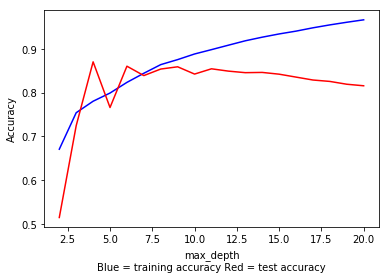

In [142]:
# FOR SMOTE DECISION TREE

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_train_sm, y_train_sm)
    
    test_score.append(model.score(X_test_1, y_test_1))
    train_score.append(model.score(X_train_sm, y_train_sm))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

# Under Sampling

Since it has the same result like the default decision tree. we will build another sets of data by under-sampling the data. where class 0 and class 1 is the same input data.

In [143]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=random_state)
X_us, y_us = rus.fit_resample(X_train_1, y_train_1)

In [144]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_us))

Resampled dataset shape Counter({0: 3760, 1: 3760})


In [145]:
# Traing the decision tree
model_dt_uns = DecisionTreeClassifier(random_state=random_state)
model_dt_uns.fit(X_us, y_us)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [146]:
# Checking the Train and Test accuracy of the Decision Tree model
print("Train accuracy:", model_dt_uns.score(X_us, y_us))
print("Test accuracy:", model_dt_uns.score(X_test_1, y_test_1))

Train accuracy: 0.9998670212765958
Test accuracy: 0.5730933054729567


In [147]:
# Prediction based on X_test data
y_pred = model_dt_uns.predict(X_test_1)

# Printing overall report of the prediction
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70     10832
           1       0.17      0.57      0.26      1611

   micro avg       0.57      0.57      0.57     12443
   macro avg       0.53      0.57      0.48     12443
weighted avg       0.80      0.57      0.64     12443



In [148]:
from Data_Prep import analyse_feature_importance

# analyse feature importance 
analyse_feature_importance(model_dt_uns, X_log.columns)

VehOdo : 0.09168923836811302
VehBCost : 0.09108623805881146
VehYear : 0.06851296406912792
MMRAcquisitionAuctionAveragePrice : 0.053655018627212815
WarrantyCost : 0.05286603696596656
MMRCurrentRetailAveragePrice : 0.04968572349936125
MMRCurrentAuctionAveragePrice : 0.04679171494799241
MMRAcquisitionRetailAveragePrice : 0.04619982155910858
MMRCurrentRetailCleanPrice : 0.046152422540164086
MMRCurrentAuctionCleanPrice : 0.04545761174347635
PurchaseMonth : 0.04378629366508949
MMRAcquisitionAuctionCleanPrice : 0.04266338424344036
MMRAcquisitonRetailCleanPrice : 0.03802133230162652
WheelType_Alloy : 0.02003014901292767
Auction_MANHEIM : 0.014446411479167408
Color_GOLD : 0.008459616280067538
VNST_CO : 0.008162942934940791
VNST_NC : 0.008128059586804445
Color_GREY : 0.008061190633670038
Color_SILVER : 0.007548446305752306


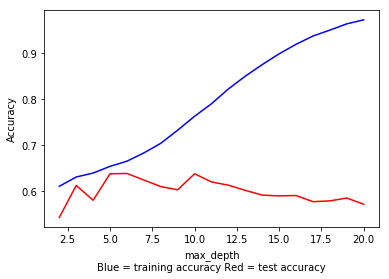

In [149]:
# FOR UNDER SAMPLED DECISION TREE

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_us, y_us)
    
    test_score.append(model.score(X_test_1, y_test_1))
    train_score.append(model.score(X_us, y_us))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

#### Overfitting of the under sampled decision tree model
From the above resulting plot, we can conclude that there is still overfitting. It produced better training accuracy with lower test accuracy and larger gap between training/test performance, which is a huge indication of overfitting but still far better than previous model. Its also not a good model as the test accuracy is going down

The above clasification report shows more improvement than above 2 models. as the recall, precision and f1-score for class 1 is better than before

# Upsampling the minority class

In [150]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=random_state)
X_os, y_os = ros.fit_resample(X_train_1, y_train_1)
print('Resampled dataset shape %s' % Counter(y_os))

Resampled dataset shape Counter({0: 25273, 1: 25273})


In [151]:
# Traing the decision tree
model_dt_os = DecisionTreeClassifier(random_state=random_state)
model_dt_os.fit(X_os, y_os)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [152]:
# Checking the Train and Test accuracy of the Decision Tree model
print("Train accuracy:", model_dt_os.score(X_os, y_os))
print("Test accuracy:", model_dt_os.score(X_test_1, y_test_1))

Train accuracy: 0.9996438887350136
Test accuracy: 0.7957887969139275


In [153]:
# Prediction based on X_test data
y_pred = model_dt_os.predict(X_test_1)

# Printing overall report of the prediction
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     10832
           1       0.23      0.25      0.24      1611

   micro avg       0.80      0.80      0.80     12443
   macro avg       0.56      0.56      0.56     12443
weighted avg       0.80      0.80      0.80     12443



In [154]:
from Data_Prep import analyse_feature_importance

# analyse feature importance
analyse_feature_importance(model_dt_os, X_log.columns)

VehOdo : 0.09244731477392404
VehBCost : 0.0892229652124997
VehYear : 0.060851761377410316
MMRCurrentRetailCleanPrice : 0.05740984270456724
MMRCurrentAuctionCleanPrice : 0.055514387218630584
MMRCurrentAuctionAveragePrice : 0.051657184473747855
MMRCurrentRetailAveragePrice : 0.05135439800231604
MMRAcquisitionRetailAveragePrice : 0.049474235646567055
WarrantyCost : 0.04642641744284723
MMRAcquisitonRetailCleanPrice : 0.04532478818695112
MMRAcquisitionAuctionCleanPrice : 0.04526829112543051
PurchaseMonth : 0.040630435362831875
MMRAcquisitionAuctionAveragePrice : 0.03976602911818159
WheelType_Alloy : 0.01874042259125123
Auction_MANHEIM : 0.0158172331388891
VNST_NC : 0.008926746544853075
Color_GREY : 0.007910969879770722
Color_SILVER : 0.007622234126023789
WheelType_Covers : 0.007535973398686795
VNST_FL : 0.007383379882904599


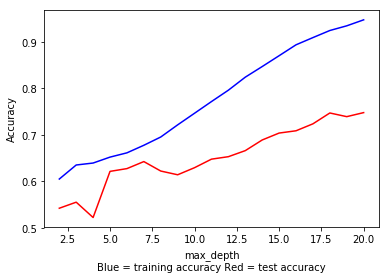

In [155]:
# FOR Over SAMPLED DECISION TREE

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_os, y_os)
    
    test_score.append(model.score(X_test_1, y_test_1))
    train_score.append(model.score(X_os, y_os))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

The over samnpled data have better training and test accuracy than other models.

# Visualizing the Decision tree

In [119]:
#Visualizing the decision tree
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model_dt_os, out_file=dotfile, feature_names=X.columns, filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("default_dt_viz.png") 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.194146 to fit



True

# Selection of the data
From the above experiments, we found that there was class imbalance with class 1 as a minority class. To overcome this we use different methods like smote, oversampling and undersampling to tackle that. We found out that the oversampling method produces better accuracy rate both in tratining and testing data, as well as better precision, recall and f1-score.
Oversampled Data will be used for further analysis.

#               Decision tree tuned with GridSearchCV With OverSampled Data

In [40]:
# Importing the GridSearch library
from sklearn.model_selection import GridSearchCV

In [41]:
# Grid Search CV
# Max_depth in range(2, 7) since it produce better result 
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv_os = GridSearchCV(param_grid = params, estimator = DecisionTreeClassifier(random_state = random_state), cv = 10)
cv_os.fit(X_os, y_os)

print("Train accuracy:", cv_os.score(X_os, y_os))
print("Test accuracy:", cv_os.score(X_test_1, y_test_1))

# test the best model
y_pred = cv_os.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

# print parameters of the best model
print(cv_os.best_params_)

Train accuracy: 0.6588058402247458
Test accuracy: 0.6193040263602025
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     10832
           1       0.20      0.64      0.30      1611

   micro avg       0.62      0.62      0.62     12443
   macro avg       0.56      0.63      0.52     12443
weighted avg       0.83      0.62      0.68     12443

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 30}


In [44]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(25, 35)}

cv_os_2 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=random_state), cv=10)
cv_os_2.fit(X_os, y_os)

print("Train accuracy:", cv_os_2.score(X_os, y_os))
print("Test accuracy:", cv_os_2.score(X_test_1, y_test_1))

# test the best model
y_pred = cv_os_2.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

# print parameters of the best model
print(cv_os_2.best_params_)

Train accuracy: 0.6588058402247458
Test accuracy: 0.6193040263602025
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     10832
           1       0.20      0.64      0.30      1611

   micro avg       0.62      0.62      0.62     12443
   macro avg       0.56      0.63      0.52     12443
weighted avg       0.83      0.62      0.68     12443

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 29}


In [96]:
from Data_Prep import analyse_feature_importance

# analyse feature importance 
analyse_feature_importance(cv_os_2.best_estimator_, X_log.columns)

VehYear : 0.32436440879333733
VehBCost : 0.15570175411314865
WheelType_Alloy : 0.11683384285460707
Auction_MANHEIM : 0.08903503913917425
WheelType_Covers : 0.049037351397495876
VehOdo : 0.043789320687868276
WarrantyCost : 0.03969346021779535
MMRCurrentAuctionCleanPrice : 0.029545315585177777
MMRCurrentRetailAveragePrice : 0.018424654513041108
Make_CHRYSLER : 0.015177959258837985
MMRAcquisitionAuctionCleanPrice : 0.012045804485309225
PurchaseYear : 0.010690104113041703
Auction_OTHER : 0.010243409522154816
TopThreeAmericanName_GM : 0.009531131515355604
PurchaseMonth : 0.008557155701381857
VNST_TX : 0.008139166699481651
MMRAcquisitionRetailAveragePrice : 0.008030190164122989
MMRCurrentRetailCleanPrice : 0.007176710276823049
MMRAcquisitonRetailCleanPrice : 0.006049810702565746
VNST_MS : 0.00604679717895592


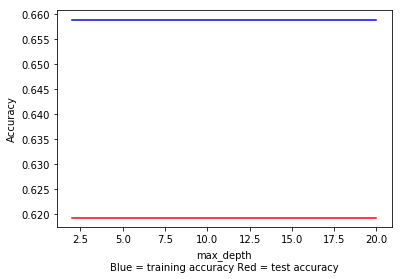

In [221]:
test_score = []
train_score = []

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(25, 35)}

# checking the model performance 
for max_depth in range(2, 21):
    model = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=random_state), cv=10)
    model.fit(X_os, y_os)
    
    test_score.append(model.score(X_test_1, y_test_1))
    train_score.append(model.score(X_os, y_os))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

# Visualizing Descision Tree of Oversampled GridSearchCV 

In [51]:
# Visualizing the decision tree
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(cv_os_2, out_file=dotfile, feature_names=X.columns, filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("GridSearch_dt_viz.png") 


True

# Default Linear Regression

#### Standardisation   Training logistic regression by using Over sample

use standardisation rescale input variables to have mean of 0 and standard deviation of 1, the purpose of above code is to ensuring all of them are on same scale.

In [66]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    
    col = X_os[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_os = scaler.fit_transform(X_os, y_os)

print("After scaling\n-------------")
for i in range(5):
    col = X_os[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test_1 = scaler.transform(X_test_1)

Before scaling
-------------
Variable #0: min 2009.0, max 2010.0, mean 2009.51 and std dev 0.50
Variable #1: min 1.0, max 12.0, mean 6.49 and std dev 3.47
Variable #2: min 2001.0, max 2010.0, mean 2005.03 and std dev 1.78
Variable #3: min 577.0, max 480444.0, mean 72662.30 and std dev 14546.13
Variable #4: min 889.0, max 32250.0, mean 5887.71 and std dev 2475.04
After scaling
-------------
Variable #0: min -1.0121819778627226, max 0.9879646366668738, mean 0.00 and std dev 1.00
Variable #1: min -1.5832182651795303, max 1.5894722783299033, mean -0.00 and std dev 1.00
Variable #2: min -2.265735278162855, max 2.7902327506909472, mean -0.00 and std dev 1.00
Variable #3: min -4.955635735972553, max 28.033699310536203, mean -0.00 and std dev 1.00
Variable #4: min -2.019643879189699, max 10.651244255632058, mean 0.00 and std dev 1.00


In [67]:
from sklearn.linear_model import LogisticRegression

initiate a model object using oversample

In [68]:
# Intialising the logistic model
model = LogisticRegression(random_state=random_state)

# fit the over sampled training data
model.fit(X_os, y_os)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
# training and test accuracy
print("Train accuracy:", model.score(X_os, y_os))
print("Test accuracy:", model.score(X_test_1, y_test_1))

# classification report on test data
y_pred_1 = model.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

Train accuracy: 0.6517033988841847
Test accuracy: 0.6419673712127301
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     10832
           1       0.21      0.62      0.31      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.56      0.63      0.53     12443
weighted avg       0.83      0.64      0.70     12443



In [70]:
# Checking the co-efficients value
print(model.coef_)

[[ 1.38464733e-01  5.52822869e-03 -3.93572737e-01  6.63228499e-02
  -1.07409582e+00  6.39241628e-01  7.59185679e-01 -7.78247048e-02
   1.35967030e+00 -7.40684814e-01 -7.44946212e-01  1.58748612e-02
  -4.06423214e-01  1.81498121e-02  3.73433928e-02  8.09653002e-02
  -9.93062386e-02  3.22196916e-02  2.94108314e-02  2.59205182e-02
   4.81881337e-03  9.87073812e-02 -5.42053161e-02 -1.49360026e-01
  -1.34555620e-04 -1.27778857e-02 -1.15700832e-01  9.75266449e-02
   4.66316742e-02 -2.18368389e-02 -5.49091461e-02  9.95629813e-02
   7.53005205e-02  2.62575231e-02  6.99673448e-02  2.74351943e-02
   4.32050891e-02  2.01133608e-02 -2.06411085e-01  3.11971802e-02
   6.54469933e-02  6.96295050e-02  4.83739395e-02  2.32497039e-02
   1.58345924e-01 -1.66400693e-01 -3.62147303e-03 -1.18193490e-01
   1.31182817e-02 -7.77570288e-03 -8.78594219e-04  1.92806659e-02
   7.11837476e-03 -1.97891835e-02 -1.23735369e-02 -1.90598407e-02
   5.29559508e-02 -3.69538204e-03  3.33417190e-03  2.92887675e-02
   7.97190

After values corresponds to a feature in dataset. below code is print out feature name associated with each coefficient

Positive coefficient means positive change in the input feature has positive correlation to the prediction value. Negative coefficient does the reverse.

In [72]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

MMRCurrentAuctionAveragePrice : 1.3596702978289217
MMRAcquisitionAuctionAveragePrice : -1.0740958194837167
MMRAcquisitionRetailAveragePrice : 0.7591856790931758
MMRCurrentRetailAveragePrice : -0.7449462116902944
MMRCurrentAuctionCleanPrice : -0.7406848137415357
MMRAcquisitionAuctionCleanPrice : 0.6392416282615064
VehBCost : -0.4064232139099464
VehYear : -0.3935727371854212
Nationality_TOP LINE ASIAN : 0.29570164245815367
TopThreeAmericanName_GM : -0.21301980170734267
Make_NISSAN : -0.206411085199464
TopThreeAmericanName_CHRYSLER : 0.18649471461287817
Nationality_OTHER ASIAN : -0.18033186081690866
WheelType_Covers : -0.1667323687417918
Make_TOYOTA : -0.16640069339492652
WheelType_Alloy : 0.1662801372244644
Make_SUZUKI : 0.15834592373089218
VNST_NE : -0.1539578349491727
Make_DODGE : -0.14936002603871637
PurchaseYear : 0.1384647331477593


Visualizing the result

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

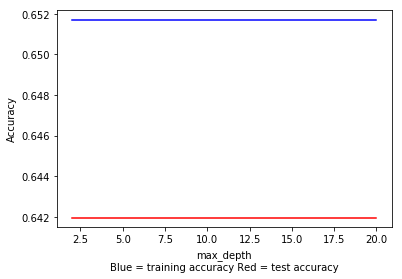

In [74]:
# Plotting the training and test accuracy of the model
test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = LogisticRegression(random_state=random_state)
    model.fit(X_os, y_os)
    
    train_score.append(model.score(X_os, y_os))
    test_score.append(model.score(X_test_1, y_test_1))
       
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# What does the plot indicate? 

- Finding optimal hyperparameters with GridSearchCV 
- hyperparameter C
- Smaller Cmeans strong regularisation

In [200]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_os, y_os)

# test the best model using oversampled data
print("Train accuracy:", cv.score(X_os, y_os))
print("Test accuracy:", cv.score(X_test_1, y_test_1))

y_pred = cv.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

# print parameters of the best model
print(cv.best_params_)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.6440470066869782
Test accuracy: 0.6366631841195853
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     10832
           1       0.21      0.63      0.31      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.56      0.63      0.53     12443
weighted avg       0.83      0.64      0.70     12443

{'C': 1000}


Distributions Distplot for skewed data

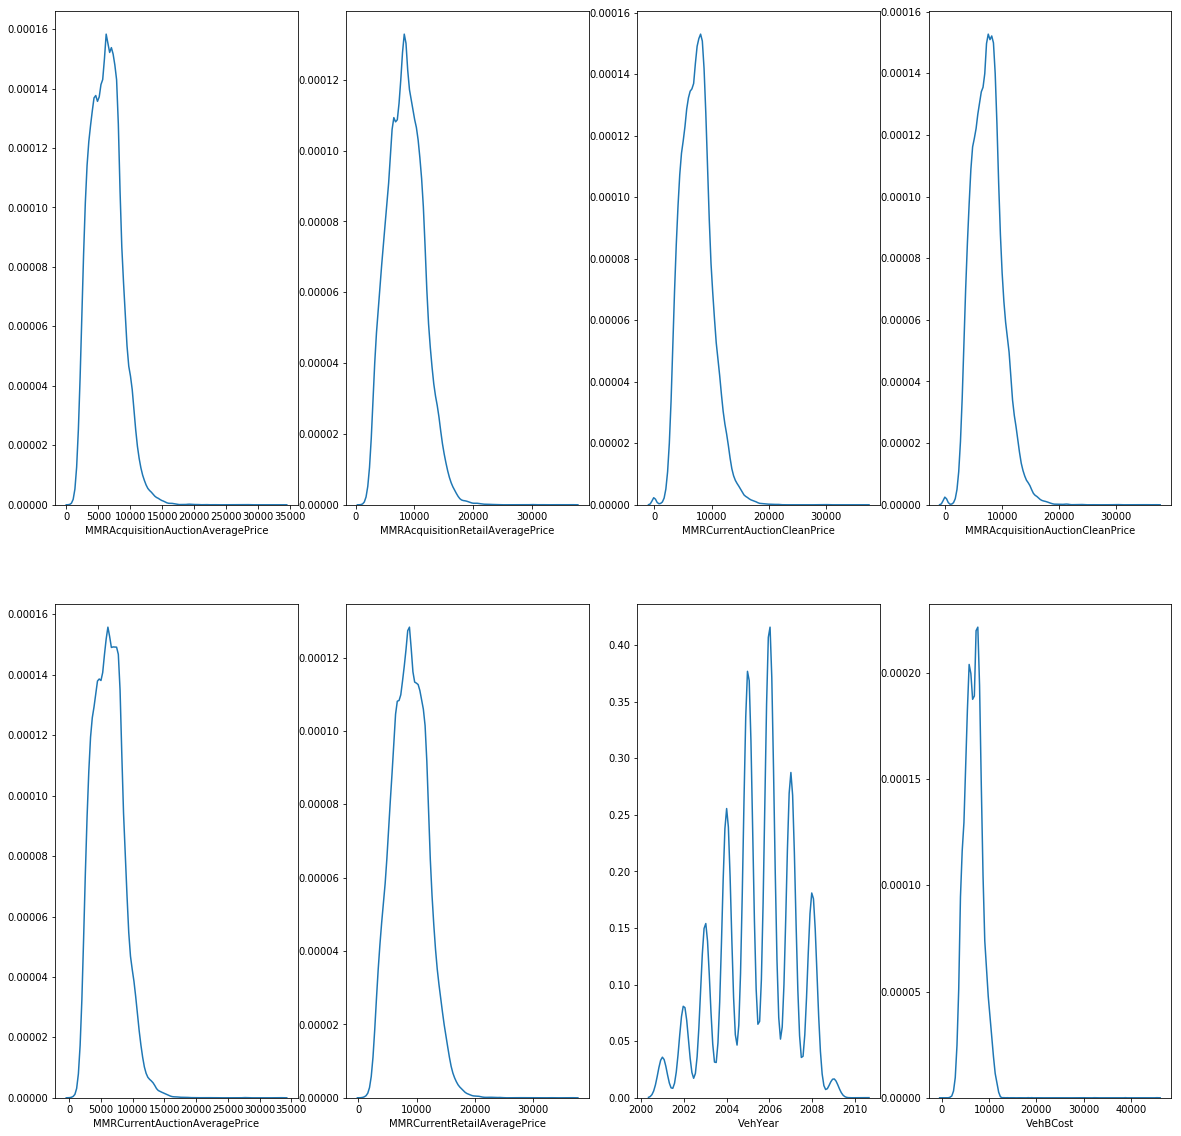

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group 1

def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(2,4, figsize=(20,20), sharex=False)

    # gift group 1 plots
    sns.distplot(df['MMRAcquisitionAuctionAveragePrice'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['MMRAcquisitionRetailAveragePrice'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['MMRCurrentAuctionAveragePrice'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['MMRCurrentRetailAveragePrice'].dropna(), hist=False, ax=axes[1,1])

    # gift group 2 plots
    sns.distplot(df['MMRCurrentAuctionCleanPrice'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['MMRAcquisitionAuctionCleanPrice'].dropna(), hist=False, ax=axes[0,3])
    sns.distplot(df['VehYear'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['VehBCost'].dropna(), hist=False, ax=axes[1,3])

    plt.show()
    
plot_skewed_columns(df)

diagrams show some degree of skew in their distribution. Normalise these skewed distribution.
below code use log transformation which measure the order of magnitude of the underlying measure instead of the measure itself.

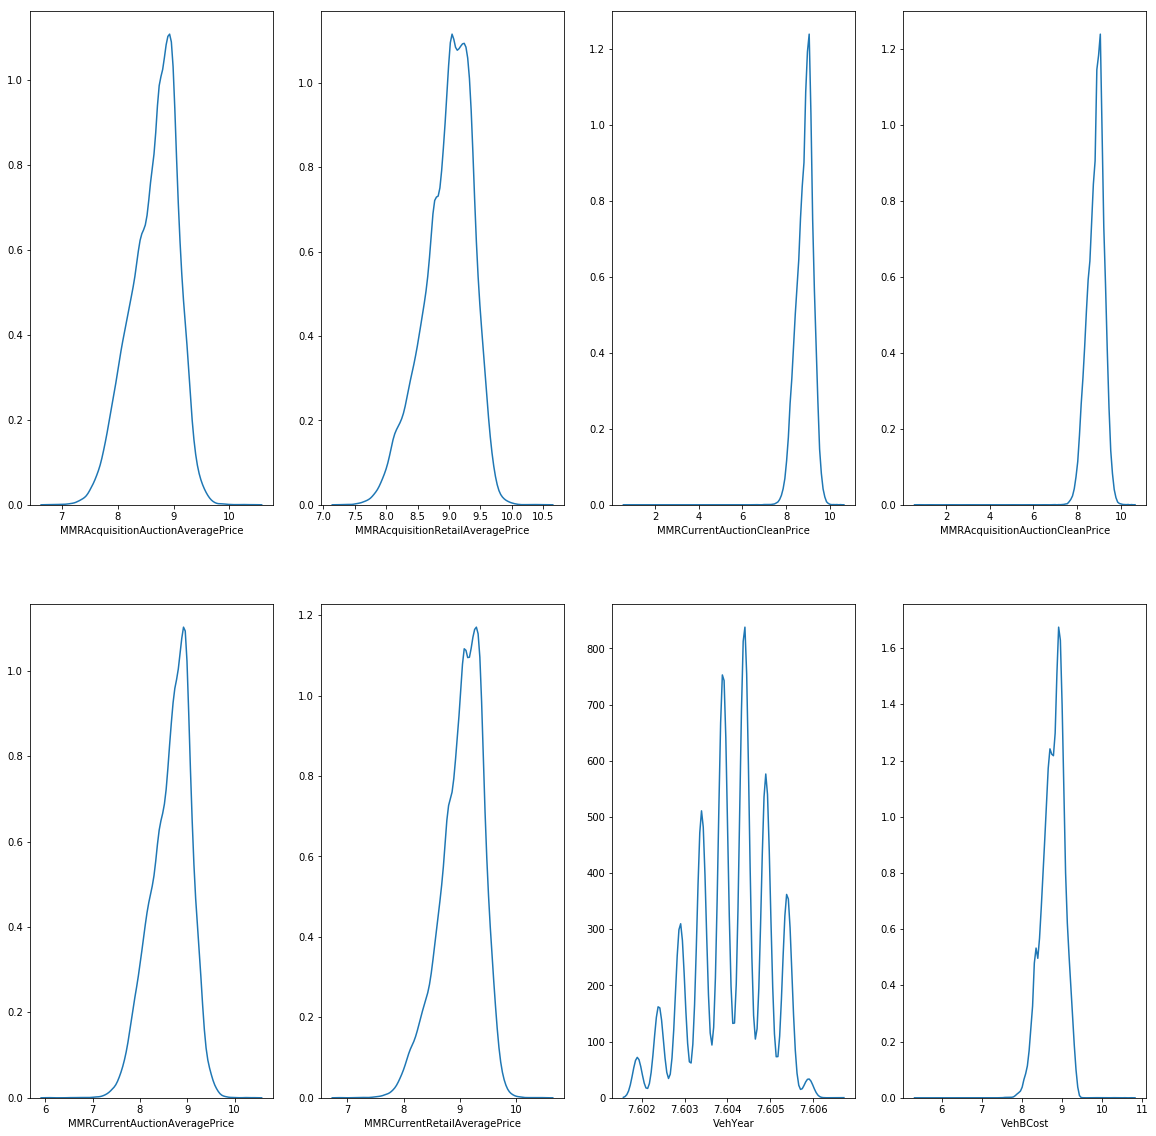

In [204]:
import numpy as np

# Group 1

# list columns to be transformed
columns_to_transform = ['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice',
                        'MMRCurrentRetailAveragePrice','MMRCurrentAuctionCleanPrice','MMRAcquisitionAuctionCleanPrice','VehYear'
                       ,'VehBCost']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

# plot them again to show the distribution
plot_skewed_columns(df_log)

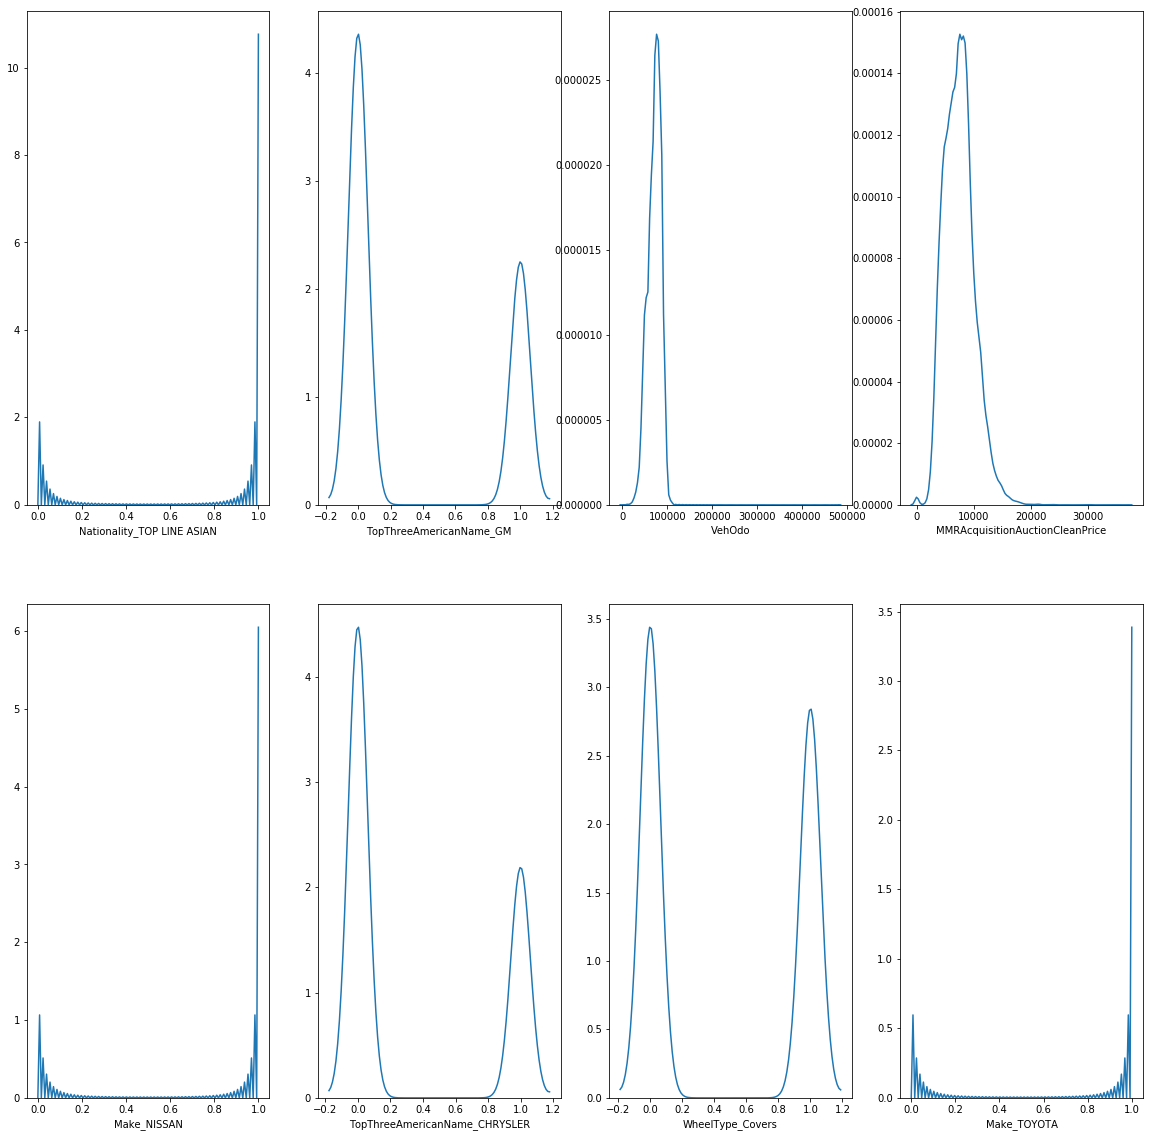

In [206]:
 #Group 2

def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(2,4, figsize=(20,20), sharex=False)

    # gift group 3 plots
    sns.distplot(df['Nationality_TOP LINE ASIAN'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['TopThreeAmericanName_GM'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['Make_NISSAN'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['TopThreeAmericanName_CHRYSLER'].dropna(), hist=False, ax=axes[1,1])

    # gift group 4 plots
    sns.distplot(df['VehOdo'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['MMRAcquisitionAuctionCleanPrice'].dropna(), hist=False, ax=axes[0,3])
    sns.distplot(df['WheelType_Covers'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['Make_TOYOTA'].dropna(), hist=False, ax=axes[1,3])

    plt.show()
    
plot_skewed_columns(df)

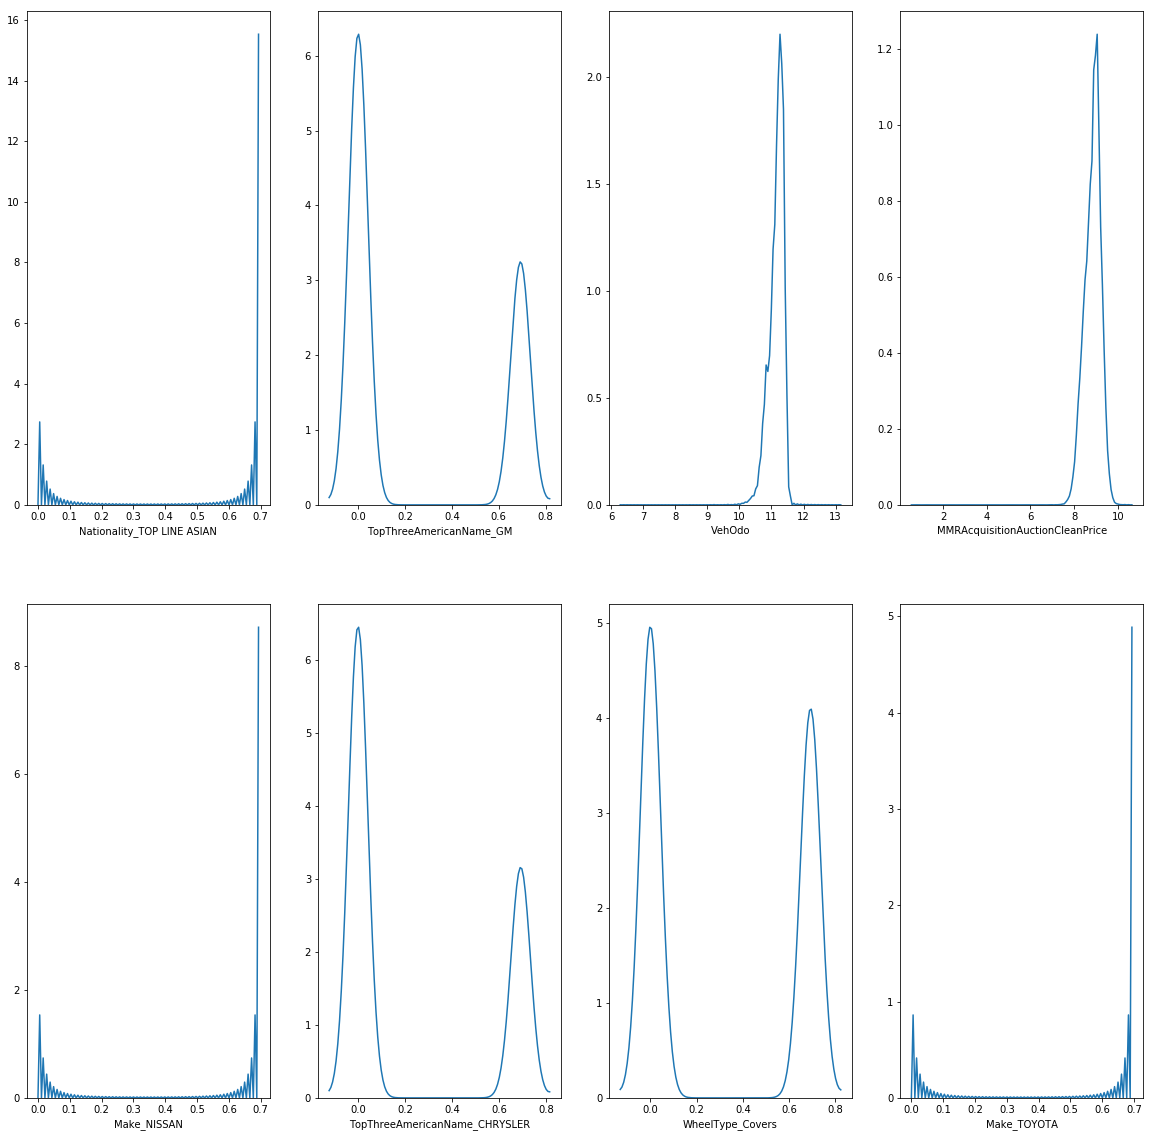

In [211]:
import numpy as np

#group 2

# list columns to be transformed
columns_to_transform = ['Nationality_TOP LINE ASIAN','TopThreeAmericanName_GM','Make_NISSAN','TopThreeAmericanName_CHRYSLER',
                        'VehOdo','MMRAcquisitionAuctionCleanPrice','WheelType_Covers','Make_TOYOTA']

# copy the dataframe
df_log = df.copy() 

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

# plot them again to show the distribution
plot_skewed_columns(df_log)

In [82]:
# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_os, y_os)
X_test_log = scaler_log.transform(X_test_1)

Start by rescaling and resampling the training and test data.

In [84]:
# create X, y and train test data partitions
y_log = df_log['IsBadBuy']
X_log = df_log.drop(['IsBadBuy'], axis=1)
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=random_state)
# Oversampling imbalanced data
ros = RandomOverSampler(random_state=random_state)
X_train_log, y_train_log = ros.fit_resample(X_train_log, y_train_log)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


use grid search to find the optimal C value again

In [227]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.6523167016183279
Test accuracy: 0.6431728682793538
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     10832
           1       0.21      0.61      0.31      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.56      0.63      0.53     12443
weighted avg       0.83      0.64      0.70     12443

{'C': 1000}


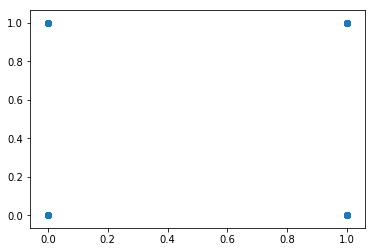

In [244]:
plt.scatter(y_test_log,y_pred)

In [238]:
model1 = LogisticRegression(C = 1000, random_state=random_state, n_jobs = -1)
model1.fit(X_train_log, y_train_log)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=100, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
# grab feature importances from the model and feature name from the original X
coef = model1.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:]

for i in indices:
    print(feature_names[i], ':', coef[i])

MMRAcquisitionAuctionAveragePrice : -0.8343989040592498
MMRCurrentAuctionAveragePrice : 0.7884447497092854
Nationality_TOP LINE ASIAN : 0.6930681562551775
TopThreeAmericanName_GM : -0.649472284185734
TopThreeAmericanName_CHRYSLER : 0.6154074230884046
MMRAcquisitionRetailAveragePrice : 0.5521134528628622
MMRCurrentRetailAveragePrice : -0.5436548343516702
Make_NISSAN : -0.5056711358673565
Make_DODGE : -0.4962501486217329
Make_CHEVROLET : 0.4773761948609684
Nationality_OTHER ASIAN : -0.4498253167538209
Make_TOYOTA : -0.3778913708205172
Make_CHRYSLER : -0.3650898000742753
VehBCost : -0.32657056096254555
VehYear : -0.3006717362014875
Make_SUZUKI : 0.27508848089533294
Make_PONTIAC : 0.2748919121245487
MMRCurrentAuctionCleanPrice : -0.2588329758244563
Make_HONDA : -0.25526533985250793
MMRAcquisitionAuctionCleanPrice : 0.25155753640744394
Make_KIA : 0.241265545437672
Make_SATURN : 0.23776437263817982
VNST_NE : -0.22722101322206437
Make_HYUNDAI : 0.22400267013085734
Make_JEEP : -0.1874623290990

#### RFE with cross validation
Initiate the RFE with a logistic regression estimator and 10-fold validation and fit it to start eliminating features.

In [88]:
from sklearn.feature_selection import RFECV

In [89]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=random_state), cv=10)
rfe.fit(X_train_log, y_train_log) 

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)

# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

Original feature set 121
Number of features after elimination 105


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.6522771336999961
Test accuracy: 0.6434943341637869
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     10832
           1       0.21      0.62      0.31      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.56      0.63      0.53     12443
weighted avg       0.83      0.64      0.70     12443

{'C': 1}


Original feature set 121
Number of features after elimination 69

69 features as the optimal number of features that is important to the analysis

use .transform() the original input set, taking only the important features.

 Write about the how many features that has been eliminated and the accuracy report how this better than previous model

GridSearchCV with new input set

#### Feature selection using decisionTree 

In [91]:
from sklearn.tree import DecisionTreeClassifier

# similar parameters with the last practical
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=random_state), cv=10)
cv.fit(X_train_log, y_train_log)

print(cv.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 30}


In [92]:
from Data_Prep import analyse_feature_importance

# analyse feature importance from the tuned decision tree against log transformed X
analyse_feature_importance(cv.best_estimator_, X_log.columns)

VehYear : 0.3243644087933373
VehBCost : 0.1557017541131486
WheelType_Alloy : 0.11683384285460705
Auction_MANHEIM : 0.08903503913917424
WheelType_Covers : 0.04903735139749587
VehOdo : 0.04378932068786827
WarrantyCost : 0.039693460217795344
MMRCurrentAuctionCleanPrice : 0.02954531558517777
MMRCurrentRetailAveragePrice : 0.018424654513041105
Make_CHRYSLER : 0.015177959258837984
MMRAcquisitionRetailAveragePrice : 0.014080000866688733
MMRAcquisitionAuctionCleanPrice : 0.012045804485309222
PurchaseYear : 0.010690104113041702
Auction_OTHER : 0.010243409522154814
TopThreeAmericanName_GM : 0.009531131515355602
PurchaseMonth : 0.008557155701381856
VNST_TX : 0.00813916669948165
MMRCurrentRetailCleanPrice : 0.007176710276823047
VNST_MS : 0.006046797178955919
TopThreeAmericanName_FORD : 0.005546284076848142


In [93]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

print(X_train_sel_model.shape)

(50546, 16)


In [95]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train_log)

print("Train accuracy:", cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_model, y_test_log))

# test the best model
y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.636964349305583
Test accuracy: 0.6351362211685285
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     10832
           1       0.20      0.62      0.31      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.56      0.63      0.53     12443
weighted avg       0.83      0.64      0.69     12443

{'C': 10}


Regression model using the subset based from RFE and Feature select mode

In [ ]:
# Use subset value to create another RFE

In [212]:
col_list = ['MMRCurrentAuctionAveragePrice','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentRetailAveragePrice'
     ,'MMRCurrentAuctionCleanPrice','MMRAcquisitionAuctionCleanPrice','VehBCost','VehYear','VehOdo','WarrantyCost','PurchaseMonth'
     ,'Nationality_TOP LINE ASIAN','TopThreeAmericanName_GM','Make_NISSAN','TopThreeAmericanName_CHRYSLER','Nationality_OTHER ASIAN',
     'WheelType_Covers','Make_TOYOTA','WheelType_Alloy','IsBadBuy']

# Default Neural Network

In [156]:
# Importing related libraries for neural network
from sklearn.neural_network import MLPClassifier

In [157]:
model = MLPClassifier(random_state=random_state) 
model.fit(X_os, y_os)

print("Train accuracy:", model.score(X_os, y_os))
print("Test accuracy:", model.score(X_test_1, y_test_1))

y_pred = model.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

print(model)

Train accuracy: 0.5394294306176552
Test accuracy: 0.8538133890540867
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     10832
           1       0.31      0.10      0.15      1611

   micro avg       0.85      0.85      0.85     12443
   macro avg       0.59      0.53      0.54     12443
weighted avg       0.80      0.85      0.82     12443

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=100, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


As we can see that the train accuracy is way higher than the test accuracy, it shows that the model shows a sign of overfitting.

In [158]:
model = MLPClassifier(max_iter=100, random_state=random_state) 
model.fit(X_os, y_os)

print("Train accuracy:", model.score(X_os, y_os))
print("Test accuracy:", model.score(X_test_1, y_test_1))

y_pred = model.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

print(model)

Train accuracy: 0.5394294306176552
Test accuracy: 0.8538133890540867
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     10832
           1       0.31      0.10      0.15      1611

   micro avg       0.85      0.85      0.85     12443
   macro avg       0.59      0.53      0.54     12443
weighted avg       0.80      0.85      0.82     12443

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=100, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


Since there is no error that shows convergence not reached, it means that it has reached convergence before the maximum number of iteration set.

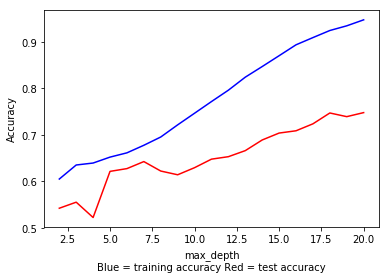

In [159]:
# FOR DEFAULT NEURAL NETWORK

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_os, y_os)
    
    train_score.append(model.score(X_os, y_os))
    test_score.append(model.score(X_test_1, y_test_1))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

# Neural network tuned with GridSearchCV

In [160]:
print(X_os.shape)

(50546, 121)


In [161]:
# Tuning a neural network model with one hidden layer of 20 to 120 neurons, increment of 20

from sklearn.model_selection import GridSearchCV

params = {'hidden_layer_sizes': [(x,) for x in range(5, 122, 20)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_os, y_os)

print("Train accuracy:", cv.score(X_os, y_os))
print("Test accuracy:", cv.score(X_test_1, y_test_1))

y_pred = cv.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

print(cv.best_params_)

Train accuracy: 0.5943892691805485
Test accuracy: 0.7532749336976613
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10832
           1       0.22      0.34      0.26      1611

   micro avg       0.75      0.75      0.75     12443
   macro avg       0.55      0.58      0.56     12443
weighted avg       0.81      0.75      0.78     12443

{'hidden_layer_sizes': (5,)}


5 neurons is returned as the optimal number thus we start tuning around the number of nuerons to find the better optimal number

In [162]:
# tuning around the number of neuron to find the optimal number 

params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_os, y_os)

print("Train accuracy:", cv.score(X_os, y_os))
print("Test accuracy:", cv.score(X_test_1, y_test_1))

y_pred = cv.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

print(cv.best_params_)

Train accuracy: 0.5943892691805485
Test accuracy: 0.7532749336976613
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10832
           1       0.22      0.34      0.26      1611

   micro avg       0.75      0.75      0.75     12443
   macro avg       0.55      0.58      0.56     12443
weighted avg       0.81      0.75      0.78     12443

{'hidden_layer_sizes': (5,)}


Number 5 is returned once again meaning that it is already the optimal number of neurons. We then start tuning the second parameter which is the alpha value.

In [163]:
# tuning around the number of neuron returned earlier to find the optimal number
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_os, y_os)

print("Train accuracy:", cv.score(X_os, y_os))
print("Test accuracy:", cv.score(X_test_1, y_test_1))

y_pred = cv.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

print(cv.best_params_)

Train accuracy: 0.5
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.00      0.00      0.00      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.44      0.50      0.47     12443
weighted avg       0.76      0.87      0.81     12443

{'alpha': 1e-05, 'hidden_layer_sizes': (5,)}


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The GridSearch returned a hidden layer with 5 neurons and 0.00001 as the alpha as the optimal hyperparameters

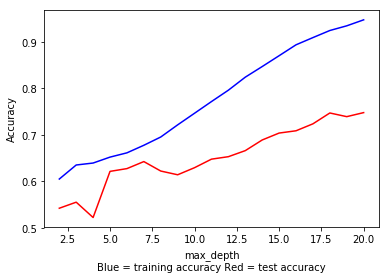

In [165]:
# FOR Neural Network tuned with GridSearchCV

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_os, y_os)
    
    train_score.append(model.score(X_os, y_os))
    test_score.append(model.score(X_test_1, y_test_1))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

# Log Transformation

In [166]:
# Log transformation

from sklearn.preprocessing import StandardScaler

columns_to_transform = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

#columns_to_transform = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice']
    
# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

Tuning another neural network model after doing log transformation to correct the skewed distribution

In [167]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

print(cv.best_params_)

Train accuracy: 0.7060301507537688
Test accuracy: 0.6611749578076027
              precision    recall  f1-score   support

           0       0.91      0.67      0.78     10832
           1       0.21      0.58      0.31      1611

   micro avg       0.66      0.66      0.66     12443
   macro avg       0.56      0.63      0.54     12443
weighted avg       0.82      0.66      0.72     12443

{'alpha': 0.001, 'hidden_layer_sizes': (7,)}


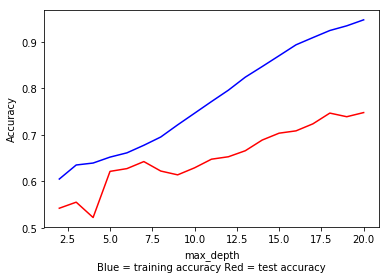

In [168]:
# FOR Neural Network tuned with GridSearchCV after log transformation

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_train_log, y_train_log)
    
    train_score.append(model.score(X_train_log, y_train_log))
    test_score.append(model.score(X_test_log, y_test_log))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

# Recursive Feature Elimination (RFE) for Decision Tree 

In [169]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=random_state), cv=10)
rfe.fit(X_train_log, y_train_log)

print(rfe.n_features_)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

105


RFE for regression has selected 105 features as the best set of features. Thus, we will train another neural network model with the rfe transformed data.

In [170]:
# transform log 
X_train_rfe = rfe.transform(X_train_log)
X_test_rfe = rfe.transform(X_test_log)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_rfe, y_train_log)

print("Train accuracy:", cv.score(X_train_rfe, y_train_log))
print("Test accuracy:", cv.score(X_test_rfe, y_test_log))

y_pred = cv.predict(X_test_rfe)
print(classification_report(y_test_log, y_pred))

print(cv.best_params_)

Train accuracy: 0.697582400189926
Test accuracy: 0.6638270513541751
              precision    recall  f1-score   support

           0       0.91      0.68      0.78     10832
           1       0.21      0.58      0.31      1611

   micro avg       0.66      0.66      0.66     12443
   macro avg       0.56      0.63      0.54     12443
weighted avg       0.82      0.66      0.72     12443

{'alpha': 0.001, 'hidden_layer_sizes': (7,)}


Compared to the previous log transformed data, this neural network model performed worse than the log transformed dataset

In [ ]:
# FOR RECURSIVE FEATURE ELIMINATION (RFE FOR REGRESSION)

test_score = []
train_score = []

# checking the model performance 
for max_depth in range(2, 21):
    model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
    model.fit(X_train_rfe, y_train_log)
    
    train_score.append(model.score(X_train_rfe, y_train_log))
    test_score.append(model.score(X_test_log, y_test_log))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training accuracy Red = test accuracy')
plt.ylabel('Accuracy')
plt.show()

# Recursive Feature Elimination (RFE) for Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 8),
          'min_samples_leaf': range(20, 61, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=random_state), cv=10)
cv.fit(X_train_log, y_train_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(3, 8), 'min_samples_leaf': range(20, 61, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

print(X_train_sel_model.shape)

(50546, 17)


SelectFromModel reduces the dataset to just 17 variables and we will tune another neural network model with this data set.

In [174]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train_log)

print("Train accuracy:", cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_model, y_test_log))

y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

print(cv.best_params_)

Train accuracy: 0.668460412297709
Test accuracy: 0.6425299365104878
              precision    recall  f1-score   support

           0       0.92      0.64      0.76     10832
           1       0.21      0.64      0.32      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.57      0.64      0.54     12443
weighted avg       0.83      0.64      0.70     12443

{'alpha': 1e-05, 'hidden_layer_sizes': (7,)}


In this case, the model performed worse than the previous RFE with Regression and the model that is trained using the log transformed data remains as the best neural network model.

# Ensamble Model and Compairing Models

Building the best resulting Decision tree, logistic regression and neural network model where the training and testing rate is good with less or no overfitting. 

In [175]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# grid search CV for decision tree
params_dt = {'criterion': ['gini'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(25, 35)}

cv = GridSearchCV(param_grid=params_dt, estimator=DecisionTreeClassifier(random_state=random_state), cv=10)
cv.fit(X_os, y_os)

dt_model = cv.best_estimator_
print(dt_model)

# grid search CV for logistic regression
params_log_reg = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params_log_reg, estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

log_reg_model = cv.best_estimator_
print(log_reg_model)

# grid search CV for NN
params_nn = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params_nn, estimator=MLPClassifier(max_iter=500, random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train_log)

nn_model = cv.best_estimator_
print(nn_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=29, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=100, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [180]:
y_pred_dt = dt_model.predict(X_test_1)
y_pred_log_reg = log_reg_model.predict(X_test_sel_log)
y_pred_nn = nn_model.predict(X_test_sel_model)

# checking the classification report 
print("------------------------------------------------------")
print("Classification report for Decision tree")
print(classification_report(y_test_log, y_pred_dt))
print("------------------------------------------------------")

print("------------------------------------------------------")
print("Classification report for Logistic Regression")
print(classification_report(y_test_log, y_pred_log_reg))
print("------------------------------------------------------")

print("------------------------------------------------------")
print("Classification report for NeurL Network")
print(classification_report(y_test_log, y_pred_nn))
print("------------------------------------------------------")

print("Accuracy score on test for DT:", accuracy_score(y_test_1, y_pred_dt))
print("Accuracy score on test for logistic regression:", accuracy_score(y_test_log, y_pred_log_reg))
print("Accuracy score on test for NN:", accuracy_score(y_test_log, y_pred_nn))

------------------------------------------------------
Classification report for Decision tree
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     10832
           1       0.20      0.64      0.30      1611

   micro avg       0.62      0.62      0.62     12443
   macro avg       0.56      0.63      0.52     12443
weighted avg       0.83      0.62      0.68     12443

------------------------------------------------------
------------------------------------------------------
Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     10832
           1       0.21      0.62      0.31      1611

   micro avg       0.64      0.64      0.64     12443
   macro avg       0.56      0.63      0.53     12443
weighted avg       0.83      0.64      0.70     12443

------------------------------------------------------
----------------------------------------

Based on the above result of test accuracy, precision, recall and f1-score , we can conclude that the Neural network model performs better than other two model.

In [181]:
# typical prediction
y_pred = dt_model.predict(X_test_1)

# probability prediction from decision tree
y_pred_proba_dt = dt_model.predict_proba(X_test_1)

print("Probability produced by decision tree for each class vs actual prediction on IsBadBuy (0 = No, 1 = Yes). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on IsBadBuy (0 = No, 1 = Yes). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.7058677274987568 	 0.2941322725012432 	 0
0.27303465765004226 	 0.7269653423499577 	 1
0.855310621242485 	 0.14468937875751503 	 0
0.5399113082039911 	 0.46008869179600886 	 0
0.7058677274987568 	 0.2941322725012432 	 0
0.855310621242485 	 0.14468937875751503 	 0
0.9254237288135593 	 0.07457627118644068 	 0
0.5625639277190589 	 0.437436072280941 	 0
0.7058677274987568 	 0.2941322725012432 	 0
0.7676348547717843 	 0.23236514522821577 	 0
0.22799343903772554 	 0.7720065609622745 	 1
0.3358024691358025 	 0.6641975308641975 	 1
0.855310621242485 	 0.14468937875751503 	 0
0.5399113082039911 	 0.46008869179600886 	 0
0.4180790960451977 	 0.5819209039548022 	 1
0.46613545816733065 	 0.5338645418326693 	 1
0.4737704918032787 	 0.5262295081967213 	 1
0.6665757906215921 	 0.3334242093784

In [182]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = dt_model.predict_proba(X_test_1)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_sel_log)
y_pred_proba_nn = nn_model.predict_proba(X_test_sel_model)

roc_index_dt = roc_auc_score(y_test_1, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_test_1, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_test_1, y_pred_proba_nn[:, 1])

print("ROC index on test for DT:", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN:", roc_index_nn)

ROC index on test for DT: 0.6761706010285639
ROC index on test for logistic regression: 0.6866649452114204
ROC index on test for NN: 0.6948270155238129


Nenural network model produces the best ROC score which means that neural network models performs better on varied discrimination threshold than other two models , with logistic regression in second decision tree model at last.

In [184]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_1, y_pred_proba_dt[:,1])
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test_1, y_pred_proba_log_reg[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test_1, y_pred_proba_nn[:,1])

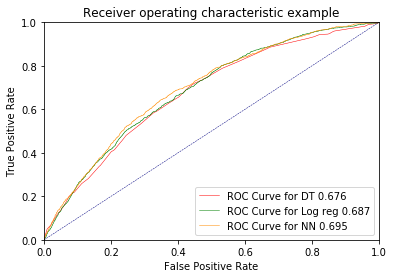

In [188]:
# Plotting the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg, label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg), color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn), color='darkorange', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The ROC curve also demonstrates that the nenural network model is better than other two models with the largest curve area, with logistic regression in second decision tree model at last. 

All there statistical evaluation metrics agreed that the neureal network model is the best performing model.

Ensmbel modelling which combines the prediction from multiple models to produce a stronger model. we will build a simple voting-based bagging model to combine three models.

In [194]:
# import the model
from sklearn.ensemble import VotingClassifier

# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_model), ('lr', log_reg_model), ('nn', nn_model)], voting='soft')

In [197]:
# fit the voting classifier to training data
voting.fit(X_train_sel_log, y_train_log)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train_sel_log, y_train_log))
print("Ensemble test accuracy:", voting.score(X_test_sel_log, y_test_log))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test_sel_log)
roc_index_ensemble = roc_auc_score(y_test_log, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ensemble train accuracy: 0.6969097455782851
Ensemble test accuracy: 0.6670417101985052
ROC score of voting classifier: 0.6977554378272713


It can be seen that the ensemble method managed to produce higher scores with higher test accuracy and slightly better ROC score. compared to the three individual models.